In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 60000 training datasets and 10000 test datasets

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimenstions of the images are mpt 28x28."
assert(X_test.shape[1:] == (28, 28)), "The dimenstions of the images are mpt 28x28."

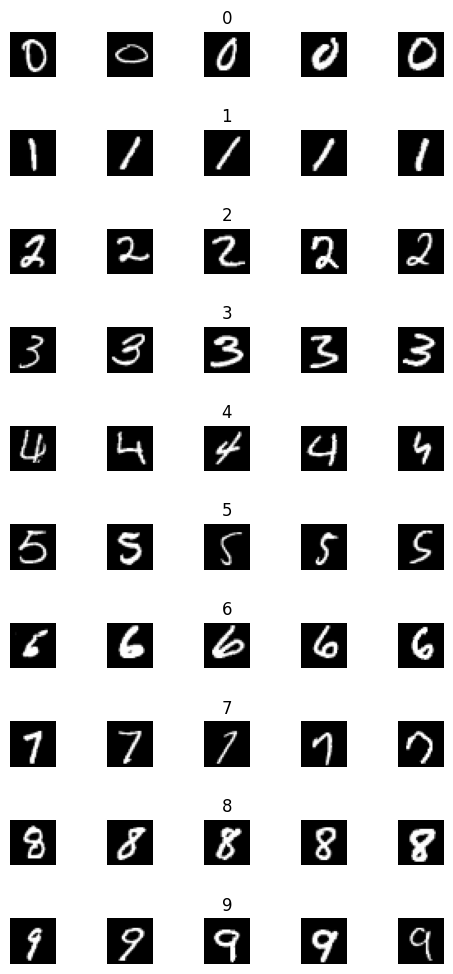

In [6]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10)) # 5 x 10 크기의 여러가지 fig를 생성함.
fig.tight_layout() # 각 fig 가 overlap 되지 않게 해줌
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j));
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

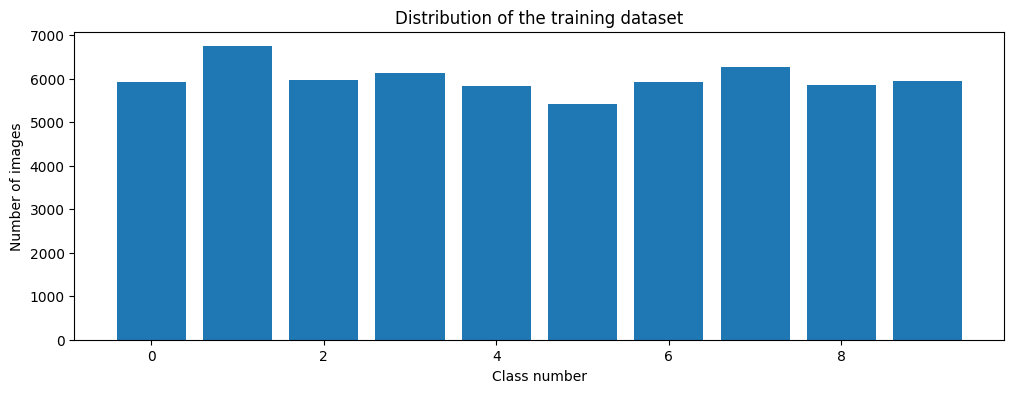

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train, 10) # one hot encoding 실행으로 카테고리의 연관성을 배제.
y_test = to_categorical(y_test, 10)

In [11]:
X_train = X_train/255 # 0~255 는 분산이 너무 커서 sigmoid나 softmax값 구하기가 힘듬(eg. e^255 = 엄청 큰 수). 따라서 0 ~ 1사이로 normalization을 함.
X_test = X_test/255

In [12]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels) # 28 x 28 형태의 이미지는 [w1 w2 w3 ... bias] 에 행렬곱을 할 수 없다. 따라서 784길이의 1d array로 flatten 후 neural network에 인풋으로 넣는것.
X_test = X_test.reshape(X_test.shape[0], num_pixels) # 따라서 input 노드는 784 + 1개라고 볼 수 있다

In [13]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim= num_pixels, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size=200, verbose = 1, shuffle=1) # validation set은 training set의 10%를 가져다 씀

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.5422 - accuracy: 0.8342 - val_loss: 0.2829 - val_accuracy: 0.9193
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.9089 - val_loss: 0.2472 - val_accuracy: 0.9278
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2866 - accuracy: 0.9167 - val_loss: 0.2331 - val_accuracy: 0.9325
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2726 - accuracy: 0.9208 - val_loss: 0.2280 - val_accuracy: 0.9303
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2584 - accuracy: 0.9245 - val_loss: 0.2183 - val_accuracy: 0.9340
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2568 - accuracy: 0.9237 - val_loss: 0.2195 - val_accuracy: 0.9375
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2467 - accuracy: 0.9277 - val_loss: 0.2242 - val_accuracy: 0.9347
Epoch 

Text(0.5, 0, 'epoch')

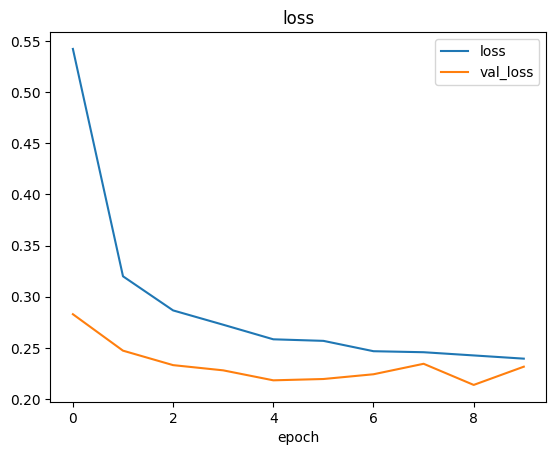

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

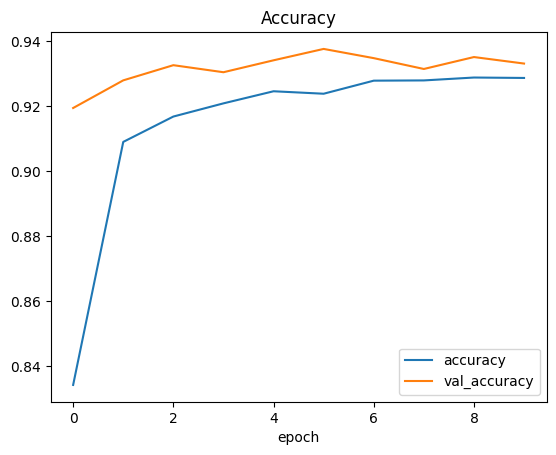

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) # evaluation of loss function, error
print('Test accuracy:', score[1]) # accuracy

Test score: 0.27157193422317505
Test accuracy: 0.9221000075340271


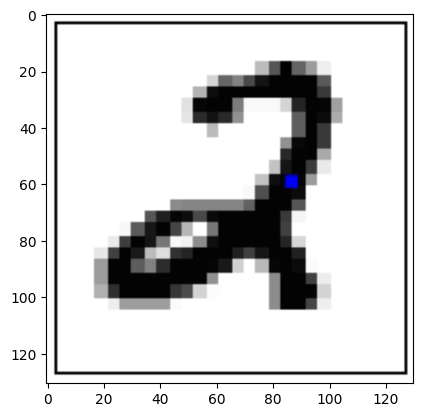

In [19]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

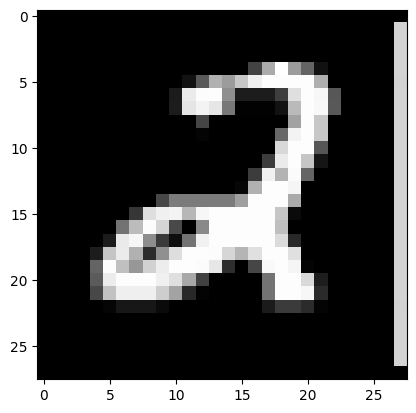

In [20]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [21]:
image = image/255
image = image.reshape(1, 784)

In [22]:
prediction = np.argmax(model.predict(image),axis=1) 
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 102ms/step
predicted digit: [2]
